Enter number of clusters: 15
K = 15


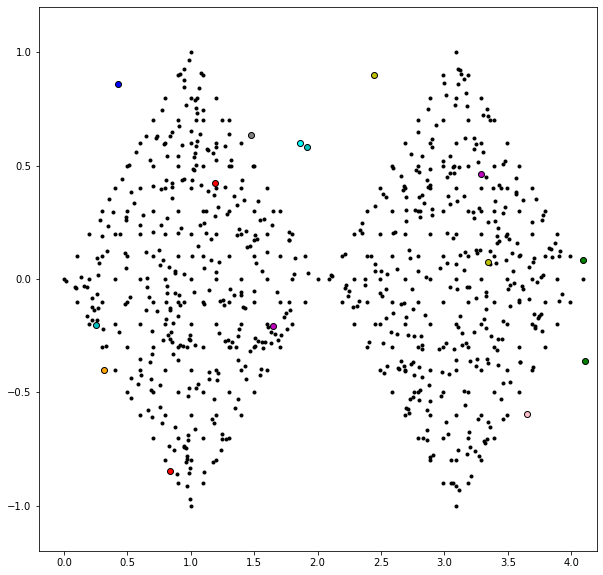

In [73]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd


# USER INPUT FOR NUMBER OF CLUSTERS
k = int(input("Enter number of clusters: "))
print('K =',k)

# ASSIGNING THE COLORS TO THE CLUSTERS:
cluster_color = {1: 'y', 2: 'c', 3: 'm', 4: 'r', 5: 'g', 6: 'b', 7: 'darkblu', 8:'orange', 9: 'pink', 0: 'gray'}


# DATA INPUT
with open('cluster_data.txt') as f:
    lines = f.readlines()
    a = [line.split()[1] for line in lines]
    b = [line.split()[2] for line in lines]

for i in range(0, len(a)):
    a[i] = float(a[i])
    b[i] = float(b[i])
    
data = pd.DataFrame({
    'x': a,
    'y': b
})
    
#RANDOM CENTROID GENERATION
centroids = {
    i+1: [np.random.uniform(-0.2, 4.2), np.random.uniform(-1.2, 1.2)]
    for i in range(k)
}

#PLOT DATASET
fig = plot.figure(figsize=(10, 10))
plot.scatter(data['x'], data['y'], marker='.', color='k')
for i in centroids.keys():
    m = i%10
    plot.scatter(*centroids[i], marker='o', color=cluster_color[m], edgecolor = 'k')
plot.xlim(-0.2, 4.2)
plot.ylim(-1.2, 1.2)
plot.show()

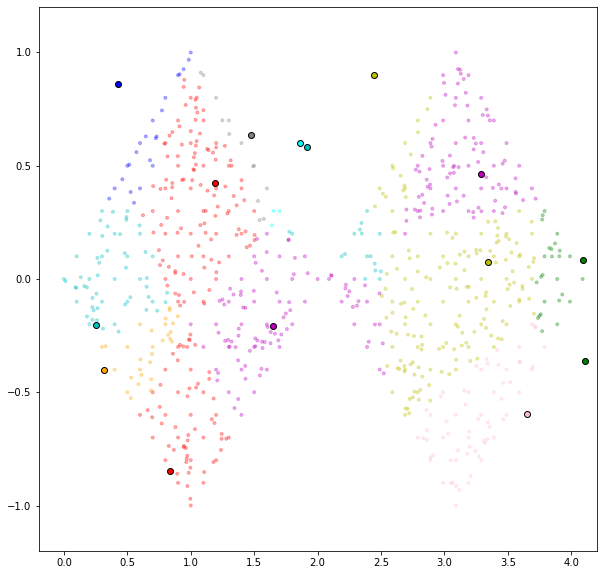

In [74]:
# FUNCTION TO UPDATE THE DISTANCE AND CLUSTER
# DISTANCE: ((x1 - x2)^2 - (y1 - y2)^2)^(0.5)

def update_dist(data, centroids):
    for i in centroids.keys():
        data['distance_{}'.format(i)] = (((data['x'] - centroids[i][0]) ** 2+ (data['y'] - centroids[i][1]) ** 2)**0.5)
    distance_col = ['distance_{}'.format(i) for i in centroids.keys()]
    data['min_dist'] = data.loc[:, distance_col].idxmin(axis=1) #idxmin() function returns index of first occurrence of minimum over requested axis
    data['closest'] = data['min_dist'].map(lambda x: int(x.lstrip('distance_')))
    data['color'] = data['closest'].map(lambda x: cluster_color[x%10])
    return data

data = update_dist(data, centroids)

#PLOT DATASET
fig = plot.figure(figsize=(10, 10))
plot.scatter(data['x'], data['y'], marker='.', color=data['color'], alpha = 0.3)
for i in centroids.keys():
    m = i%10
    plot.scatter(*centroids[i], marker='o', color=cluster_color[m], edgecolor = 'k')
plot.xlim(-0.2, 4.2)
plot.ylim(-1.2, 1.2)
plot.show()

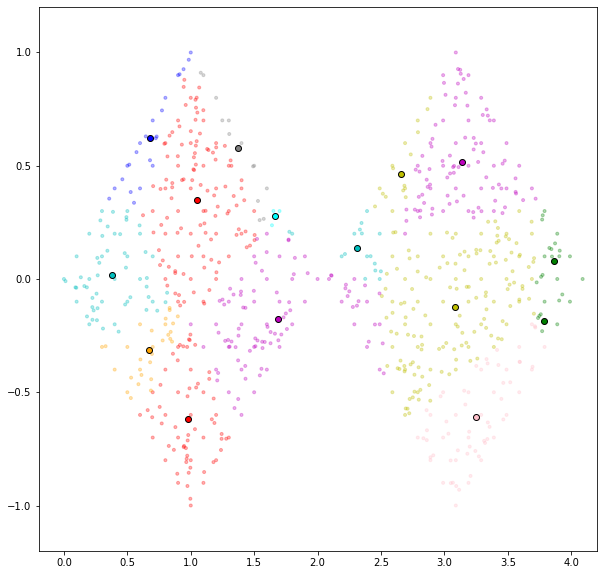

In [75]:
# FUNCTION FOR UPDATING CENTROID

def update_cent(coordinates):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['closest'] == i]['x'])
        centroids[i][1] = np.mean(data[data['closest'] == i]['y'])
    return coordinates

# UPDATE CENTROIDS STEP1
centroids = update_cent(centroids)
    
#PLOT DATASET
fig = plot.figure(figsize=(10, 10))
plot.scatter(data['x'], data['y'], marker='.', color=data['color'], alpha = 0.3)
for i in centroids.keys():
    m = i%10
    plot.scatter(*centroids[i], marker='o', color=cluster_color[m], edgecolor = 'k')
plot.xlim(-0.2, 4.2)
plot.ylim(-1.2, 1.2)
plot.show()

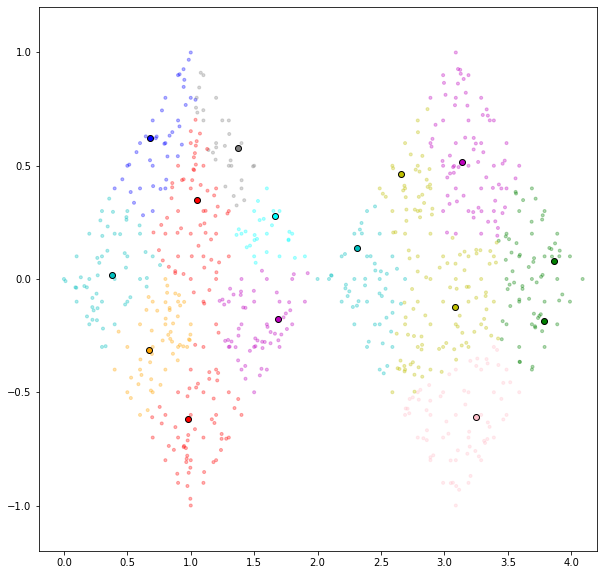

In [76]:
# UPDATE CLUSTER AFTER UPDATING CENTROID
data = update_dist(data, centroids)

#PLOT DATASET
fig = plot.figure(figsize=(10, 10))
plot.scatter(data['x'], data['y'], marker='.', color=data['color'], alpha = 0.3)
for i in centroids.keys():
    m = i%10
    plot.scatter(*centroids[i], marker='o', color=cluster_color[m], edgecolor = 'k')
plot.xlim(-0.2, 4.2)
plot.ylim(-1.2, 1.2)
plot.show()

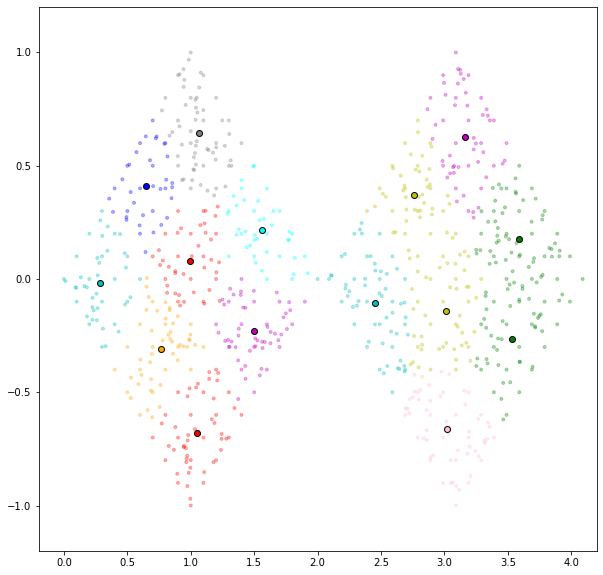

In [77]:
# UPDATE CENTROID AND CLUSTER

while True:
    closest_centroids = data['closest'].copy(deep=True)
    centroids = update_cent(centroids)
    data = update_dist(data, centroids)
    if closest_centroids.equals(data['closest']):
        break

#PLOT DATASET
fig = plot.figure(figsize=(10, 10))
plot.scatter(data['x'], data['y'], marker='.', color=data['color'], alpha = 0.3)
for i in centroids.keys():
    m = i%10
    plot.scatter(*centroids[i], marker='o', color=cluster_color[m], edgecolor = 'k')
plot.xlim(-0.2, 4.2)
plot.ylim(-1.2, 1.2)
plot.show()